# Cross-validated models: title data vectorized with TF-IDF

### Import data and packages:

In [7]:
#import data frames from previous notebook

%store -r textdata

%store -r titledata

In [8]:
# Corpus Selection
x_title = titledata.title.astype(str)

# Target Selection
y_title = titledata.label

In [2]:
import numpy as np

import pandas as pd 

from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.model_selection import KFold, cross_validate

from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC


from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, precision_recall_fscore_support, confusion_matrix, ConfusionMatrixDisplay

import matplotlib as plt

from time import process_time



### Logistic Regression - title

#### discards


In [27]:
from sklearn.linear_model import LogisticRegression

tfidf_lr = LogisticRegression()

scorer = {'accuracy': make_scorer(accuracy_score),
          'precision': make_scorer(precision_score),
          'recall': make_scorer(recall_score),
          'f1_score' : make_scorer(f1_score, average='weighted')
          }


In [28]:
cv_scores_tfidf_title_lr = cross_validate(tfidf_title_lr, x_title, y_title, cv = k_folds, scoring=scorer)

In [70]:
#scores_tfidf_title_lr

{'fit_time': array([0.82778573, 1.02925038, 0.89363432, 0.96940708, 0.87167192]),
 'score_time': array([0.1705792 , 0.12868118, 0.12666655, 0.12463927, 0.11668539]),
 'test_accuracy': array([0.89053027, 0.88404065, 0.88728546, 0.88497993, 0.88847139]),
 'test_precision': array([0.88106416, 0.87161504, 0.87434656, 0.88028577, 0.87903226]),
 'test_recall': array([0.86983391, 0.86487531, 0.87063813, 0.86246689, 0.86608527]),
 'test_f1_score': array([0.89045429, 0.88399243, 0.88726055, 0.88486684, 0.88837933])}

In [82]:
#average = (mean(list(scores_tfidf_title_lr.keys())))

average = np.mean(scores_tfidf_title_lr.keys(), axis=0)

AxisError: axis 0 is out of bounds for array of dimension 0

#### cross validation

In [21]:
#define kfolds

k_folds = KFold(n_splits = 5, random_state=42, shuffle=True)

In [22]:
#dfine pipeline

tfidf_title_lr = Pipeline([('tfidf', TfidfVectorizer()),
                     ('lr', LogisticRegression(max_iter=300))])

In [1]:
#create variables to store cross validation results
conf_matrix_list = []
accuracy =[]
precision=[]
recall = []
f1=[]
average=[]
fit_time=[]
tfidf_title_lr_results=pd.DataFrame()

for train_index, test_index in k_folds.split(x_title, y_title):

    #train and test on each fold, and compute fit time
    x_train, x_test, y_train, y_test = x_title.iloc[train_index], x_title.iloc[test_index], y_title.iloc[train_index], y_title.iloc[test_index]
    start = process_time()
    clf=tfidf_title_lr.fit(x_train,y_train)
    end=process_time()
    y_pred = tfidf_title_lr.predict(x_test)
    
    #results for each fold
    accuracy.append(accuracy_score(y_test, y_pred))
    precision.append(precision_score(y_test, y_pred))
    recall.append(recall_score(y_test, y_pred))
    f1.append(f1_score(y_test, y_pred))
    fit_time.append(end-start)

    #confusion matrix for each fold
    conf_matrix = confusion_matrix(y_test, y_pred)
    conf_matrix_list.append(conf_matrix)
    
#put cross validation results into a dataframe    
tfidf_title_lr_results['accuracy']=accuracy
tfidf_title_lr_results['precision']=precision
tfidf_title_lr_results['recall']=recall
tfidf_title_lr_results['f1 score']=f1
tfidf_title_lr_results['fit time']=fit_time
tfidf_title_lr_results.loc['mean'] = tfidf_title_lr_results.mean()


NameError: name 'pd' is not defined

In [142]:
#view data frame of results

tfidf_title_lr_results

,accuracy,precision,recall,f1 score,fit time
0,0.890530,0.881064,0.869834,0.875413,79.828125
1,0.884041,0.871615,0.864875,0.868232,131.859375
2,0.887285,0.874347,0.870638,0.872488,125.640625
3,0.884980,0.880286,0.862467,0.871285,84.671875
4,0.888471,0.879032,0.866085,0.872511,109.796875
mean,0.887062,0.877269,0.866780,0.871986,106.359375


In [145]:
#create average confusion matrix array

mean_of_conf_matrix = np.mean(conf_matrix_list, axis=0)
mean_of_conf_matrix = np.round(mean_of_conf_matrix)
mean_of_conf_matrix = mean_of_conf_matrix.astype(int)
mean_of_conf_matrix

array([[5884,  630],
       [ 692, 4504]])

[Text(0.5, 1.0, 'Logistic Regression model with Title Data (TF-IDF)'),
 Text(0.5, 0, 'Predicted'),
 Text(0, 0.5, 'Actual')]

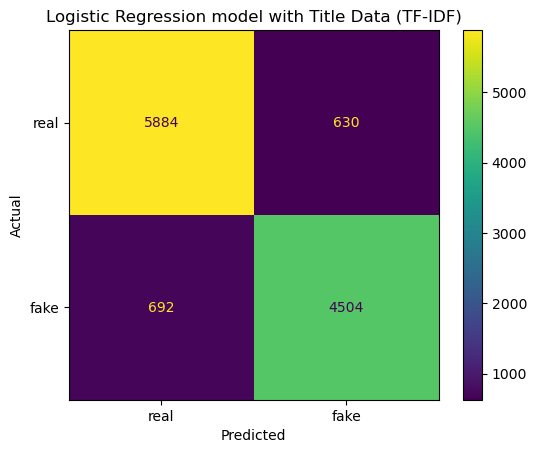

In [146]:
#plot the confusion matrix

cm_plot = ConfusionMatrixDisplay(mean_of_conf_matrix, display_labels = ['real', 'fake'])
cm_plot.plot(values_format='')
cm_plot.ax_.set(
                title='Logistic Regression model with Title Data (TF-IDF)', 
                xlabel='Predicted', 
                ylabel='Actual')
#display_labels = ['real', 'fake']

### Naive-Bayes - title

In [147]:
k_folds = KFold(n_splits = 5, random_state=42, shuffle=True)

In [150]:
tfidf_title_nb = Pipeline([('tfidf', TfidfVectorizer()),
                     ('nb', MultinomialNB())])

In [151]:
#create variables to store cross validation results
conf_matrix_list = []
accuracy =[]
precision=[]
recall = []
f1=[]
average=[]
fit_time=[]
tfidf_title_nb_results=pd.DataFrame()

for train_index, test_index in k_folds.split(x_title, y_title):

    #train and test on each fold, and compute fit time
    x_train, x_test, y_train, y_test = x_title.iloc[train_index], x_title.iloc[test_index], y_title.iloc[train_index], y_title.iloc[test_index]
    start = process_time()
    clf=tfidf_title_nb.fit(x_train,y_train)
    end=process_time()
    y_pred = tfidf_title_nb.predict(x_test)
    
    #results for each fold
    accuracy.append(accuracy_score(y_test, y_pred))
    precision.append(precision_score(y_test, y_pred))
    recall.append(recall_score(y_test, y_pred))
    f1.append(f1_score(y_test, y_pred))
    fit_time.append(end-start)

    #confusion matrix for each fold
    conf_matrix = confusion_matrix(y_test, y_pred)
    conf_matrix_list.append(conf_matrix)
    
#put cross validation results into a dataframe    
tfidf_title_nb_results['accuracy']=accuracy
tfidf_title_nb_results['precision']=precision
tfidf_title_nb_results['recall']=recall
tfidf_title_nb_results['f1 score']=f1
tfidf_title_nb_results['fit time']=fit_time
tfidf_title_nb_results.loc['mean'] = tfidf_title_nb_results.mean()


In [152]:
#view data frame of results

tfidf_title_nb_results

,accuracy,precision,recall,f1 score,fit time
0,0.870378,0.876543,0.822711,0.848775,1.062500
1,0.860388,0.868235,0.806302,0.836123,1.093750
2,0.865511,0.872832,0.815115,0.842987,0.906250
3,0.859705,0.873794,0.805524,0.838271,0.921875
4,0.864475,0.870259,0.813760,0.841062,0.890625
mean,0.864091,0.872333,0.812682,0.841444,0.975000


In [153]:
#create average confusion matrix array

mean_of_conf_matrix = np.mean(conf_matrix_list, axis=0)
mean_of_conf_matrix = np.round(mean_of_conf_matrix)
mean_of_conf_matrix = mean_of_conf_matrix.astype(int)
mean_of_conf_matrix

array([[5896,  618],
       [ 974, 4223]])

[Text(0.5, 1.0, 'Naive-Bayes model with Title Data (TF-IDF)'),
 Text(0.5, 0, 'Predicted'),
 Text(0, 0.5, 'Actual')]

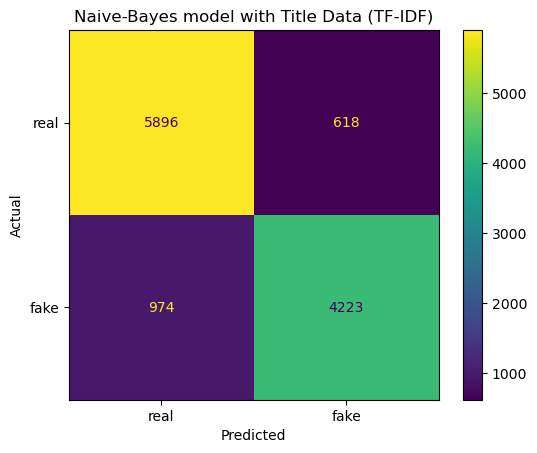

In [154]:
#plot the confusion matrix

cm_plot = ConfusionMatrixDisplay(mean_of_conf_matrix, display_labels = ['real', 'fake'])
cm_plot.plot(values_format='')
cm_plot.ax_.set(
                title='Naive-Bayes model with Title Data (TF-IDF)', 
                xlabel='Predicted', 
                ylabel='Actual')
#display_labels = ['real', 'fake']

### SVM - title

In [15]:
k_folds = KFold(n_splits = 5, random_state=42, shuffle=True)

In [16]:
tfidf_title_svm = Pipeline([('tfidf', TfidfVectorizer()),
                     ('svm', SVC())])

In [156]:
#create variables to store cross validation results
conf_matrix_list = []
accuracy =[]
precision=[]
recall = []
f1=[]
average=[]
fit_time=[]
tfidf_title_svm_results=pd.DataFrame()

for train_index, test_index in k_folds.split(x_title, y_title):

    #train and test on each fold, and compute fit time
    x_train, x_test, y_train, y_test = x_title.iloc[train_index], x_title.iloc[test_index], y_title.iloc[train_index], y_title.iloc[test_index]
    start = process_time()
    clf=tfidf_title_lr.fit(x_train,y_train)
    end=process_time()
    y_pred = tfidf_title_lr.predict(x_test)
    
    #results for each fold
    accuracy.append(accuracy_score(y_test, y_pred))
    precision.append(precision_score(y_test, y_pred))
    recall.append(recall_score(y_test, y_pred))
    f1.append(f1_score(y_test, y_pred))
    fit_time.append(end-start)

    #confusion matrix for each fold
    conf_matrix = confusion_matrix(y_test, y_pred)
    conf_matrix_list.append(conf_matrix)
    
#put cross validation results into a dataframe    
tfidf_title_svm_results['accuracy']=accuracy
tfidf_title_svm_results['precision']=precision
tfidf_title_svm_results['recall']=recall
tfidf_title_svm_results['f1 score']=f1
tfidf_title_svm_results['fit time']=fit_time
tfidf_title_svm_results.loc['mean'] = tfidf_title_svm_results.mean()


In [157]:
#view data frame of results

tfidf_title_svm_results

,accuracy,precision,recall,f1 score,fit time
0,0.890530,0.881064,0.869834,0.875413,1.750000
1,0.884041,0.871615,0.864875,0.868232,2.562500
2,0.887285,0.874347,0.870638,0.872488,3.609375
3,0.884980,0.880286,0.862467,0.871285,2.703125
4,0.888471,0.879032,0.866085,0.872511,2.281250
mean,0.887062,0.877269,0.866780,0.871986,2.581250


In [158]:
#create average confusion matrix array

mean_of_conf_matrix = np.mean(conf_matrix_list, axis=0)
mean_of_conf_matrix = np.round(mean_of_conf_matrix)
mean_of_conf_matrix = mean_of_conf_matrix.astype(int)
mean_of_conf_matrix

array([[5884,  630],
       [ 692, 4504]])

[Text(0.5, 1.0, 'SVM model with Title Data (TF-IDF)'),
 Text(0.5, 0, 'Predicted'),
 Text(0, 0.5, 'Actual')]

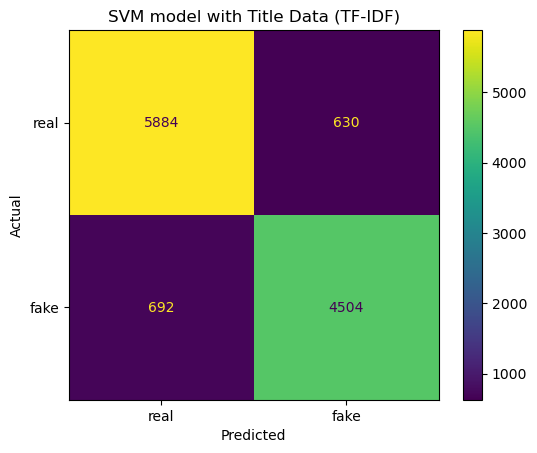

In [159]:
#plot the confusion matrix

cm_plot = ConfusionMatrixDisplay(mean_of_conf_matrix, display_labels = ['real', 'fake'])
cm_plot.plot(values_format='')
cm_plot.ax_.set(
                title='SVM model with Title Data (TF-IDF)', 
                xlabel='Predicted', 
                ylabel='Actual')
#display_labels = ['real', 'fake']

In [160]:
#save results for later use

%store tfidf_title_svm_results

Stored 'tfidf_title_svm_results' (DataFrame)
